In [77]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
#%run '../lib/grid.py'

import sys
sys.path.append('../lib/')
from grid import CollidersGrid
from planning import astar_graph
from algorithms import bresenham
from visuals import Visuals

In [78]:
import numpy as np
from enum import Enum
from queue import PriorityQueue

def astar_graph(edges, start, goal):
    # start and goal are nodes

    def dist(p1, p2):
        return np.sqrt(abs(p2[0]-p1[0])**2 + abs(p2[1]-p1[1])**2)
    
    def connected_nodes(pos):
        nodes = []
        for e in edges:
            if e[0] == pos:
                nodes.append(e[1])
            elif e[1] == pos:
                nodes.append(e[0])
        return nodes
    
    q = PriorityQueue()
    q.put((dist(start, goal), 0, start))

    visited = set()
    visited.add(start)

    branch = {}

    found = False

    while True:
        curr = q.get()
        cost = curr[1]
        pos = curr[2]
        print('curr: ' , curr)
        if pos == goal:
            found = True
            break

        if not connected_nodes(pos):
            print('NONE')
            break

        for next_node in connected_nodes(pos):
            print('next: ', next_node)
            traversing_cost = dist(curr, next_node)
            new_cost = traversing_cost + cost
            new_dist = dist(next_node, goal)

            if next_node not in visited:
                q.put((new_dist + new_cost, new_cost, next_node))
                visited.add(next_node)
                branch[next_node] = (pos, new_cost)

            elif next_node in branch and branch[next_node][1] > new_cost:
                branch[next_node] = (pos, new_cost)

    if found:
        path = []
        c = goal
        while c != start:
            path.append(c)
            c = branch[c][0]
        path.append(start)
        path = path[::-1]
        return path

(780.0, 320.0) (355.0, 260.0)
curr:  (429.2143986401202, 0, (780.0, 320.0))
next:  (790.0, 360.0)
next:  (770.0, 290.0)
curr:  (863.5589864621787, 447.47606203484776, (770.0, 290.0))
next:  (760.0, 270.0)
next:  (780.0, 320.0)
curr:  (956.0189673610744, 509.67268923163823, (790.0, 360.0))
next:  (780.0, 320.0)
next:  (775.0, 350.0)
next:  (694.0, 384.0)
curr:  (1058.079952301916, 652.956514322823, (760.0, 270.0))
next:  (770.0, 290.0)
curr:  (1161.2380772506467, 800.2713197784385, (694.0, 384.0))
next:  (790.0, 360.0)
next:  (690.0, 386.6666666666667)
curr:  (1180.5851043473017, 751.0504724490111, (775.0, 350.0))
next:  (790.0, 360.0)
next:  (761.6666666666666, 340.0)
curr:  (1752.4143146604692, 1337.9534868639478, (761.6666666666666, 340.0))
next:  (775.0, 350.0)
next:  (740.0, 321.42857142857144)
curr:  (1785.4226527828644, 1427.2754142838855, (690.0, 386.6666666666667))
next:  (694.0, 384.0)
next:  (680.0, 390.0)
curr:  (3162.502930294099, 2772.633119475468, (740.0, 321.428571428571

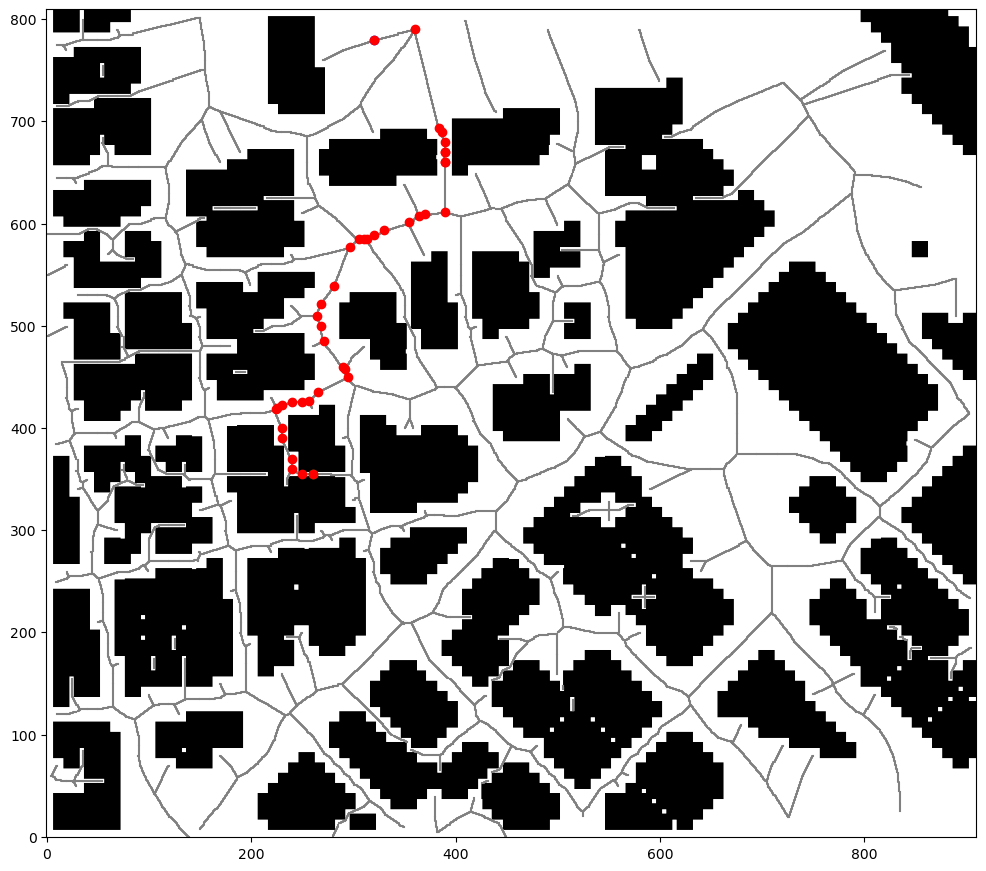

In [79]:
# Import numpy and Voronoi method and plotting routines

v = Visuals()

colliders = CollidersGrid('colliders.csv', drone_altitude=10)

v.add_grid(colliders.grid)

graph = Voronoi(colliders.points)
edges = []

#print(colliders.points)
for p in graph.ridge_vertices:
    # chek if point is inside obstacle
    p1 = graph.vertices[p[0]]
    p2 = graph.vertices[p[1]]

    cells = bresenham((int(p1[0]), int(p1[1])), (int(p2[0]), int(p2[1])))
    valid = True

    #print((int(p1[0]), int(p1[1])), (int(p2[0]), int(p2[1])))
    #print(cells)

    for c in cells:
        if np.amin(c) < 0 or c[0] >= colliders.grid.shape[0] or c[1] >= colliders.grid.shape[1]:
            valid = False
            break
        
        if colliders.grid[c[0]][c[1]] == 1:
            valid = False
            break

    if valid:
        v.add_path(cells, 'gray')
        p1 = (p1[0], p1[1])
        p2 = (p2[0], p2[1])
        edges.append((p1, p2))

    # check if point is inside grid
#print(edges)
# for e in edges:
#     v.add_point(e[0], 'bx')
#     v.add_point(e[1], 'bx')
import random
start = (780.0, 320.0) # random.choice(edges)[0]
goal = (355.0, 260.0)# random.choice(edges)[1]

print(start, goal)
v.add_point(start, 'bo')
v.add_point(goal, 'go')


path = astar_graph(edges, start, goal)



for p in path:
    print('p: ', p)
    v.add_point(p, 'ro')

v.show()
